In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import imread
from skimage import io
import pandas as pd


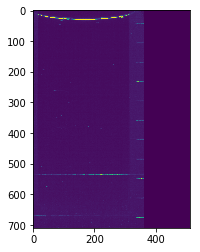

In [203]:
im = io.imread('StudentData/train/0a80270d725a8bac3d9f35195392d9cb6d42b0d5.bmp')
#df =pd.DataFrame(im)
#df
plt.imshow(im)

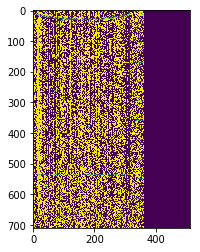

In [209]:
# canny edge detection algorithm, with sigma=1

from skimage import feature
from skimage.filters import gabor_kernel
from scipy import ndimage, misc

edges = feature.canny(im.T, sigma=0.5)
edges_sobel = ndimage.sobel(im)
#edges = gabor_kernel(im, frequency, theta=theta,
                                          #sigma_x=sigma, sigma_y=sigma)

plt.imshow(edges_sobel)

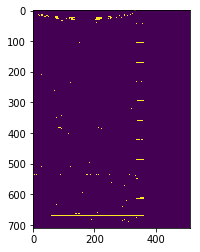

In [211]:
plt.imshow(edges.T)

In [196]:
df = pd.DataFrame(edges_sobel)
df[range(350,370)].head()

,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369
0,82,235,116,136,203,244,1,4,6,212,207,0,0,0,0,0,0,0,0,0
1,37,19,214,121,133,224,251,3,6,213,208,0,0,0,0,0,0,0,0,0
2,1,46,53,166,92,174,236,254,2,212,211,0,0,0,0,0,0,0,0,0
3,254,34,81,3,131,119,197,247,3,207,206,0,0,0,0,0,0,0,0,0
4,9,4,51,49,223,121,136,229,5,204,198,0,0,0,0,0,0,0,0,0


In [199]:
df[range(330,350)].head()

,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349
0,229,249,37,20,70,111,31,8,253,174,126,13,126,25,193,222,189,171,253,45
1,254,9,35,12,58,47,22,51,234,134,123,46,119,252,196,250,219,214,249,240
2,24,18,42,64,56,235,2,41,212,102,128,79,119,211,151,255,15,255,222,194
3,47,26,71,145,26,174,232,236,202,109,155,108,127,176,93,233,32,249,213,222
4,48,54,98,130,231,155,243,224,179,145,203,91,96,181,109,209,254,234,241,17


In [201]:
df = pd.DataFrame(edges_sobel)
df[range(310,330)].head()

,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329
0,3,7,30,103,125,12,236,4,9,143,113,184,6,62,210,175,172,231,18,247
1,2,6,31,105,115,15,254,4,11,157,141,195,210,0,190,209,212,240,32,17
2,2,8,31,103,110,8,0,12,8,135,131,245,194,205,189,216,244,20,56,38
3,0,11,36,105,109,4,248,8,4,84,125,69,169,162,221,206,3,71,56,32
4,253,12,38,107,112,11,243,254,5,74,151,100,128,130,241,210,18,102,39,249


In [202]:
df[range(290,310)].head()

,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309
0,250,254,0,4,7,253,255,5,253,254,2,0,1,1,255,254,0,5,253,0
1,0,252,1,3,2,0,254,5,255,253,254,0,3,2,255,251,255,6,255,0
2,3,254,3,1,253,3,254,2,0,0,254,0,2,2,1,251,253,4,1,0
3,254,255,4,1,254,4,253,255,1,1,1,1,254,2,3,251,252,3,2,0
4,251,253,3,3,0,5,253,253,2,0,1,2,252,2,5,249,254,5,0,0


In [198]:
# here is what one row of raw data looks like

row = np.random.randint(710)

print(im[row,:])

[ 63  76  74  75  75  74  73  69  43  38  59  61  60  58  59  56  62  77
 106  75  56  49  45  41  39  40  37  34  34  39  41  42  42  38  40  46
  48  54  45  44  43  45  40  43  43  46  37  38  40  37  33  34  34  35
  32  33  38  35  35  33  36  36  39  34  32  37  33  33  33  33  33  37
  32  33  33  34  35  31  35  35  36  30  32  35  33  31  34  34  33  30
  31  33  32  28  31  33  31  30  30  31  26  32  34  34  39  34  25  35
  41  33  35  32  24  22  24  24  26  27  32  29  30  30  36  33  33  32
  31  29  35  31  33  31  30  34  35  36  32  30  30  27  29  30  30  29
  27  23  23  25  29  25  28  29  26  28  27  29  25  32  34  32  33  32
  30  31  35  29  34  36  31  39  40  36  30  33  37  32  24  22  19  19
  17  29  22  23  23  21  23  23  22  24  23  23  24  29  29  25  26  23
  27  29  30  26  27  28  29  35  40  38  35  33  33  36  38  33  32  59
  52  36  37  33  31  35  34  30  32  30  30  34  31  32  40  33  36  32
  32  34  41  37  31  35  37  39  42  38  34  38  4

In [17]:
# brute force state function to find size of left pipe

allWidth = list()
allStart = list()
allPipeWidth = list() 

for row in range(0,710):

    done = False
    col = 511
    
    while not done:
        
        if im[row, col] != 0:
            
            allStart.append(col)
            inPipe = True
            n = 1
            
            while inPipe:
            
                col -= 1
            
                if 0.7*im[row,col+1] <= im[row,col] <= 1.3*im[row,col+1]:
                    n += 1
                else:
                    inPipe = False
                    allPipeWidth.append(n) 
                    done = True
                    
        else:
            col -= 1        

In [18]:
mean = np.average(allPipeWidth)
std = np.std(allPipeWidth)
print(mean, std)

61.04929577464789 60.139734874471074


In [19]:
# I know the answer is around 45 from image processing, so let's remove some outliers

M = len(allPipeWidth)
n = 0
while n < M:
    if allPipeWidth[n] <= (mean - std) or allPipeWidth[n] >= (mean + std):
        del allPipeWidth[n]
    M = len(allPipeWidth)
    n +=1

In [20]:
mean = np.average(allPipeWidth)
std = np.std(allPipeWidth)
print(mean, std)

48.926829268292686 38.71118212679351


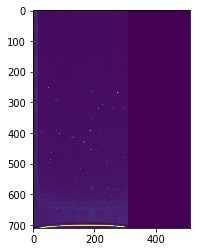

In [21]:
# crop and display new image

for row in range(0,710):
    im[row,allStart[row]-int(mean+1):allStart[row]] = 0.0

plt.imshow(im)

In [158]:
def cropImage(im):
    # brute force state function to find size of left pipe


    allWidth = list()
    allStart = list()

    allPipeWidth = []
    
    for row in range(0,710):

        done = False
        col = 511

        while not done:

            if im[row, col] != 0:

                print(im[row, :])
                allStart.append(col)
                inPipe = True
                n = 1

                capturingRow = im[row, col-40: col]
#                 average = 0
#                 for j in range(col, col+50):
#                     average += im[row, j]
#                 average = 50
#                 print(col)
#                 print(capturingRow)
                average = np.mean(capturingRow)
#                 print(average)
                
                while inPipe:

                    col -= 1

                    if 0.8*average <= im[row,col] <= 1.2*average:
                        if im[row,col]>10:
                            n += 1
                    else:
                        inPipe = False
                        allPipeWidth.append(n) 
                        done = True
#                 print("N", n)
#                 print("Average", average)
            else:
                col -= 1        
                
    mean = np.average(allPipeWidth)
    std = np.std(allPipeWidth)
    print(mean, std)

    # I know the answer is around 45 from image processing, so let's remove some outliers

    M = len(allPipeWidth)
    n = 0
    while n < M:
        if allPipeWidth[n] <= (mean - std) or allPipeWidth[n] >= (mean + std):
            del allPipeWidth[n]
        M = len(allPipeWidth)
        n +=1

    mean = np.average(allPipeWidth)
    std = np.std(allPipeWidth)
    print(mean, std)

    for row in range(0,710):
        im[row,allStart[row]-int(mean+1):allStart[row]] = 0.0

    return im

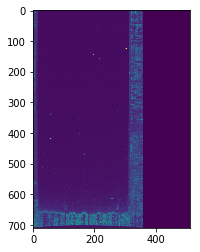

In [161]:
filename = 'StudentData/train/2cbdc77fa745d84e5b9959308286c31ccee5c735.bmp'
im = io.imread(filename)
plt.imshow(im)

[68 61 60 96 82 62 63 82 76 53 44 37 34 36 33 13  8  8  8  7  9  8  7  7
  7  7  6  8  7  7  8  7  8  7  8  7  8  7  9  8  8  8  8  6  7  9  8  8
  7  7  8  8  7  8  6  7  7  7  7  6  7  6  8  7  7  6  8  8  7  8  8  7
  8  8  8  6  7  6  7  7  8  7  7  8  6  6  7  8  8  8  6  8  6  8  7  7
  7  8  8  8  7  7  7  7  7  7  7  7  8  8  8  7  7  8  8  7  7  7  8  7
  7  8  7  7  8  8  8  7  6  7  8  7  7  7  6  8  7  6  6  6  6  7  7  7
  8  7  7  6  7  6  8  7  6  7  7  8  7  7  7  8  8  7  8  7  7  7  6  8
  8  7  7  8  7  8  8  8  8  7  8  8  7  8  6  7  6  7  8  9  8  8  8  8
  7  7  8  8  8  8  8  8  7  9  7  7  8  9  8  8  8  6  8  8  7  9  8  9
  8  7  7  8  6  8  7  7  8  8  8  8  7  7  8  7  7  8  8  7  8  7  7  7
  8  8  8  7  6  7  6  8  8  8  7  8  7  9  8  7  6  7  6  8  8  7  7  7
  8  8  7  8  8  6  8  7  8  7  7  8  7  7  8  6  8  9  7  9  8  7  7  7
  7  8  7  6  7  6  8  8  7  8  8  7  8  8  8  8  8  8  8  8  9  7  9  8
 11 15 36 48 38 40 40 42 74 65 55 74 78 65 53 40 47

  0  0  0  0  0  0  0  0]
[ 57  63  50  39  37  39  36  37  42  42  37  32  26  20  19  11   8   8
   8   7   8   8   7   8   7   8   7   8   7   8   7   8   7   8   8   7
   8   8   8   7   8   7   7   7   8   8   7   8   8   8   8   7   7   6
   8   8   7   7   7   6   7   6   7   8   8   8   8   8   6   8   7   7
   6   8   8   8   7   6   6   7   8   8   6   7   7   8   6   8   8   8
   7   8   6   7   7   8   8   6   8   7   7   7   7   7   7   7   7   8
   7   7   8   7   7   7   7   7   8   6   6   7   8   8   7   7   7   7
   7   8   7   6   7   7   6   7   8   8   7   7   8   6   7   7   8   6
   8   7   7   7   7   6   7   7   6   6   8   8   6   8   7   8   7   8
   7   7   8   7   8   7   8   7   8   7   8   8   7   7   7   7   6   8
   7   6   8   7   7   8   9   7   8   7   7   8   7   8   8   7   8   8
   7   8   7   8   8   8   8   7   8   7   8   6   6   8   8   9   7   7
   7   8   7   7   8   8   7   7   8   8   6   8   7   6   7   7   7   7
   8   7   6   6   7   7 

   0   0   0   0   0   0   0   0]
[55 53 36 32 32 28 29 31 35 34 31 19 14 13 13  9  8  9  7  7 10  9  9  8
  8  8  8  7  8  9  8  9  8  9 21 44 14  7  8  7  7  8  8  8  9  9  8  8
  9  8  7  8  9  8  7  8  8  8  9  7  9  7  8  8  6  7  8  9  7  7  9  8
 18 12  8  8  7  8  7  7  7  8  8  7  8  7  7  7  8  7  7  8  7  7  7  7
  8  7  6  7  7  7  8  8  8  8  7  8  8  8  8  8  7  8  7  8  8  8  8  7
  7  9  8  7  7  8  7  8  8  7  7  7  7  8  7  8  8  7  9  7  7  8  8  7
  8  8  8  7  7  7  7  8  8  8  8  8  6  8  7  8  7  8  8  8  9  7  8  7
  8  8  8  8  8  7  8  7  8  8  8  9  8  8  6  7  7  7  8  8  8  8  7  7
  7  8  8  7  8  8  7  7  8  8  8  8  7  8  9  8  9  8  8  8  9  8  9  8
  8  6  8  8  6  9  7  7  8  8  8  8 10  8  7  7  8  8  9  8  8  8  9  8
  9  7  7  9  9  8  7  8  8  8  8  9  7  9  8  8  6  8  7  7  9  8  9  8
  8  8  7  8  7  8  7  7  8  8  8  7  8  8  8  8  8  8  8  8  8  8  6  7
  9  8  8  8  6  7  8  7  8  8  8  8  9  8  9  7  7  8  7  8  8  9 10 10
 16 32 35 36 35 3

  0  0  0  0  0  0  0  0]
[37 40 52 59 49 36 40 40 28 29 30 29 20 14 20 13 10  9  8  9  9  9  8  8
  8  8  8  7  8  8  9  9  8  9  8  9  9  9  9  8  8  7  7  8  8  9 10  8
  8  7  8  8  9  8  8  8  8  9  9  6  9  8  8  9  7  9  8  8  7  8  8  9
  8  8  8  8  8  7  8  7  9  8  8  8  8  8  7  8  8  8  9  8  8  8  8  7
  7  7  8  9  8  8  8  8  9  9  8  7  8  8  9  8  8  9  8  8  9  8  7  7
  8  7  8  8  8  8  9  8 10  8  8  8  8  8  8  8  8  8  8  7  8  8  8  7
  7  7  8  8  8  9  8  8  9  8  8  8  7  8  8  8  8  8  7  8  9  7  7  8
  8  8  8  9  8  9  8  8  8  8  8  9  9  8  8  8  8  8  9  7  9 10  7  8
  8  8  8  8  9  8  9  8  7  9 10  8  8  8  9  9  8  8  8  8  9  8  9  9
  8  8  8  7 10  8  8  9  8  9  8  8 10  8  7  8 10 10 10  8  7  8  9  7
  9  9  8  9  8  8  8  9  8  8  8  9  7  8  8  8  7  9  8  9 10  7  9  8
  7  8  8  9  8  8  8  9  8  9  8  8 10  7  8  8  8  9  9  9  9  8 10  9
  8  8  8  8  8  9  8  9  8  9  8  8  7 10 10  8  8  9  8  8 10  9  9 13
 23 29 36 35 30 29 37 39 

   0   0   0   0   0   0   0   0]
[ 40  39  37  33  27  30  32  33  34  28  31  31  22  15  19  21  11  10
  10  11  11  12  12  11  11  10  10  10  10  10   9  10  10  10   9   8
  10  10   9  10  10  10  10  10  11  10  11  10  10   9  10  10  10   9
  10   8  10  10  10   9   9  10   9  10  10   8  10   9   9   9  10   9
  10  10  10  10  10  10   8   9  11  10  10   9   8  10  10  10   9  10
   9  11  10  10  10  10   9  10   9  10   9  10  10  10  10   9   9  10
  10  11   8  10  10   8  10  10   9  10  10  10   9   9  10   9  10  10
   9   8  10  10   8   9  10  10  10  10  10  10  10  10   9  10   9  10
  10   9   9  10   9  10  10  10   9  10   9   9   9  10  10  10  11  11
   9  10   9  10  10  10   9  10  11  10   9   9  10  10  10  10   9  10
  10  10  11  10  11  10  10   9  10   9  10  10  10   9  10   9  10   9
  10  10  10   8  11  10  10   9  11  10  10   9  10   8   9  11  10  11
  10  10  10  10   8   9  10  10  11   9  10  11  10  11  11  10  11  10
  10  11  10  10 

  0  0  0  0  0  0  0  0]
[ 47  47  44  45  59  67  43  61  65  73  83  80  50  30  25  20  16  15
  14  13  14  14  13  13  12  12  13  12  13  13  11  12  11  12  13  13
  14  13  12  13  12  12  11  12  13  13  13  12  12  12  12  10  13  12
  11  11  12  12  13  14  11  11  12  13  13  11  11  12  12  11  12  13
  12  12  12  13  12  11  12  11  11  12  11  11  12  13  13  11  14  14
  12  13  11  11  11  13  12  10  11  14  13  12  11  13  14  14  12  12
  13  12  12  14  12  11  11  12  12  12  12  12  13  12  11  12  12  12
  12  12  13  12  11  12  11  12  10  12  12  12  13  10  10  13  11  10
  13  11  12  11  11  11  11  12  11  12  11  11  10  12  11  12  12  13
  12  12  14  12  13  13  14  13  15  13  13  12  13  11  11  12  11  12
  12  12  12  14  12  12  12  12  13  12  12  13  12  13  13  11  12  12
  11  12  12  11  11  13  14  13  12  12  12  12  13  13  13  14  12  13
  13  12  12  14  12  15  14  13  13  13  12  13  12  13  13  13  15  14
  15  13  11  12  12  13 

   0   0   0   0   0   0   0   0]
[ 77  73  72  79  74  87  81  70  53  49  68  77  54  53  59  59  68  78
 101  91  53  43  46  44  37  43  41  36  36  37  37  43  42  47  45  57
  61  61  56  58  65  64  53  54  54  59  42  39  35  37  37  34  33  36
  31  33  34  34  39  42  52  43  43  42  36  36  38  37  34  31  34  33
  32  35  33  32  30  34  32  33  32  33  29  34  35  35  33  32  32  35
  31  30  30  32  32  28  32  31  33  31  28  31  34  30  35  26  19  32
  34  38  38  28  24  27  25  25  27  25  29  31  33  32  36  37  35  30
  32  31  31  30  28  31  32  32  32  29  35  34  36  31  26  30  33  50
  31  22  21  29  35  27  30  28  30  26  26  31  27  31  35  38  29  32
  29  29  34  35  32  31  31  35  33  36  33  31  34  33  26  25  22  22
  24  25  20  27  25  30  27  28  28  24  22  31  28  30  24  27  30  26
  29  30  30  29  26  28  24  35  34  33  34  34  33  33  32  33  34  33
  33  34  35  35  31  33  32  32  32  32  29  31  29  31  30  31  30  30
  30  33  32  35 

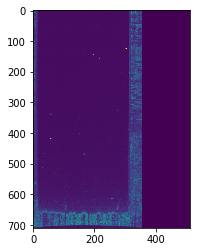

In [162]:
cropped = cropImage(im)
plt.imshow(cropped)

In [91]:
im.shape

(710, 512)

In [61]:
cropped.shape

(710, 512)

In [62]:
im

array([[68, 61, 60, ...,  0,  0,  0],
       [57, 63, 84, ...,  0,  0,  0],
       [56, 62, 73, ...,  0,  0,  0],
       ...,
       [85, 88, 74, ...,  0,  0,  0],
       [54, 49, 47, ...,  0,  0,  0],
       [22, 19, 18, ...,  0,  0,  0]], dtype=uint8)

In [63]:
cropped

array([[68, 61, 60, ...,  0,  0,  0],
       [57, 63, 84, ...,  0,  0,  0],
       [56, 62, 73, ...,  0,  0,  0],
       ...,
       [85, 88, 74, ...,  0,  0,  0],
       [54, 49, 47, ...,  0,  0,  0],
       [22, 19, 18, ...,  0,  0,  0]], dtype=uint8)

In [56]:
im.shape

(710, 512)

In [57]:
cropped.shape

(710, 512)